In [193]:
# ..................................................................................
# algoritmo PSO con Pyswarm para resolver un sistema de n ecuaciones con n incógnitas
# ..................................................................................

from pyswarm import pso
import numpy as np

In [194]:
# parametros
num_particulas = 10  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 20  # maximo numero de iteraciones
c1 = 1.4  # componente cognitivo
c2 = 1.4  # componente social
w = 0.5  # factor de inercia
limite_inf = -100   # limite inferior de busqueda
limite_sup = 100    # limite superior de busqueda

In [195]:
# función objetivo
# Voy a definir las funciones igualadas a 0, y luego la función objetivo será el 
# Valor absoluto de la diferencia
def funcion_objetivo(x):
    f1 = 3*x[0] + 2*x[1] - 9
    f2 =   x[0] - 5*x[1] - 4
    return (f1**2 + f2**2)
    

lb = [limite_inf, limite_inf]  # limite inf
ub = [limite_sup, limite_sup]  # limite sup


# Llamada a la función pso
solucion_optima, valor_optimo = pso(funcion_objetivo, lb, ub, swarmsize=num_particulas, maxiter=cantidad_iteraciones,
                                    debug=True,omega=w, phip=c1, phig=c2)
# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
Best after iteration 1: [34.67418956  0.61241423] 10025.990540699859
New best for swarm at iteration 2: [1.90512957 3.82922073] 470.3093703029069
Best after iteration 2: [1.90512957 3.82922073] 470.3093703029069
Best after iteration 3: [1.90512957 3.82922073] 470.3093703029069
Best after iteration 4: [1.90512957 3.82922073] 470.3093703029069
Best after iteration 5: [1.90512957 3.82922073] 470.3093703029069
New best for swarm at iteration 6: [-2.93293899  1.42496645] 421.0900674140444
Best after iteration 6: [-2.93293899  1.42496645] 421.0900674140444
New best for swarm at iteration 7: [-2.06387108  1.90466566] 372.51712586752126
Best after iteration 7: [-2.06387108  1.90466566] 372.51712586752126
New best for swarm at iteration 8: [ 1.25230644 -1.44655158] 86.31329008861672
Best after iteration 8: [ 1.25230644 -1.44655158] 86.31329008861672
New best for swarm at iteration 9: [ 3.85765613 -0.51124189] 8.23074956876042
Best after iteration 9: [ 3.85765613 -0.5112418

In [196]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

X1 = np.linspace(limite_inf, limite_sup, 100)
X2 = np.linspace(limite_inf, limite_sup, 100)

X = np.meshgrid(X1, X2)

C = funcion_objetivo(X)

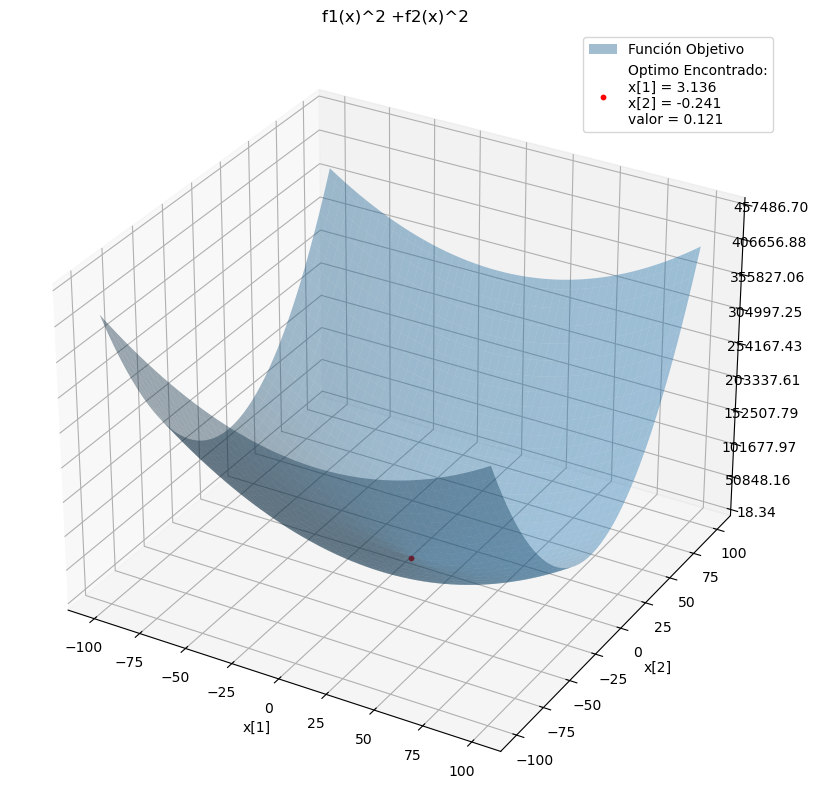

In [200]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X[0], X[1], C,
                       linewidth=0, antialiased=True, alpha=0.4,
                       label='Función Objetivo')

# Customize the z axis.
ax.set_zlim(C.min()-C.min()*.1, C.max()+C.max()*.1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
f_de_x = f'f1(x)^2 +f2(x)^2'

fig.set_size_inches(10,10)
ax.set_title(f_de_x)
ax.set_xlabel("x[1]")
ax.set_ylabel("x[2]")


leyenda = f'Optimo Encontrado:\nx[1] = {solucion_optima[0]:.3f}\nx[2] = {solucion_optima[1]:.3f}\nvalor = {valor_optimo:.3f}'

ax.scatter(*solucion_optima, valor_optimo, c='red', marker='o', s=10, label=leyenda)

plt.legend()

# ax.view_init()

plt.show()


In [198]:
gbests =np.array([
    [-9.3584015,-27.67999586,  509.76377511253577],
    [-9.3584015,-27.67999586,  509.76377511253577],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759],
    [10.48207211,-36.91173846, 5.958849019207759]]
)
gbests

array([[ -9.3584015 , -27.67999586, 509.76377511],
       [ -9.3584015 , -27.67999586, 509.76377511],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902],
       [ 10.48207211, -36.91173846,   5.95884902]])

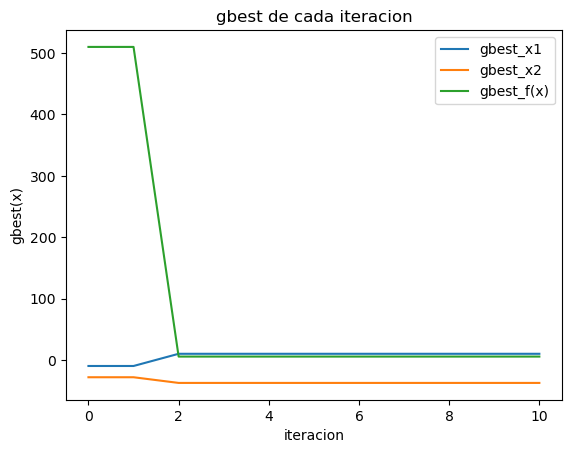

In [199]:
variable = ['x1','x2','f(x)']
for i in range(3):
    plt.plot(gbests[:,i], label=f'gbest_{variable[i]}')
# plt.plot(gbests[:,1], label='fitness_gbest(y)')
plt.title('gbest de cada iteracion')
plt.xlabel('iteracion')
plt.ylabel('gbest(x)')
plt.legend()
plt.show()